In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from scipy.cluster import hierarchy
from scipy.spatial import distance_matrix
from fcmeans import FCM

%matplotlib inline

ModuleNotFoundError: ignored

In [ ]:
# ! pip install fuzzy-c-means

In [2]:
df = pd.read_csv('/content/mall_customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
df.describe(include='all')

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200,200.000000,200.000000,200.000000
unique,NaN,2,NaN,NaN,NaN
top,NaN,Female,NaN,NaN,NaN
freq,NaN,112,NaN,NaN,NaN
mean,100.500000,NaN,38.850000,60.560000,50.200000
std,57.879185,NaN,13.969007,26.264721,25.823522
min,1.000000,NaN,18.000000,15.000000,1.000000
25%,50.750000,NaN,28.750000,41.500000,34.750000
50%,100.500000,NaN,36.000000,61.500000,50.000000
75%,150.250000,NaN,49.000000,78.000000,73.000000


In [4]:
df.Gender, uniques = pd.factorize(df.Gender)

In [5]:
map_gender = dict(zip(np.arange(len(uniques)), uniques))

In [6]:
map_gender = dict(zip(np.arange(len(uniques)), uniques))
# map_gender
df.Gender.map(lambda x: map_gender[x])

0        Male
1        Male
2      Female
3      Female
4      Female
        ...  
195    Female
196    Female
197      Male
198      Male
199      Male
Name: Gender, Length: 200, dtype: object

In [7]:
df.rename(index=str, columns={'Annual Income (k$)': 'Income',
                              'Spending Score (1-100)': 'Score'}, inplace=True)
df.head()

,CustomerID,Gender,Age,Income,Score
0,1,0,19,15,39
1,2,0,21,15,81
2,3,1,20,16,6
3,4,1,23,16,77
4,5,1,31,17,40


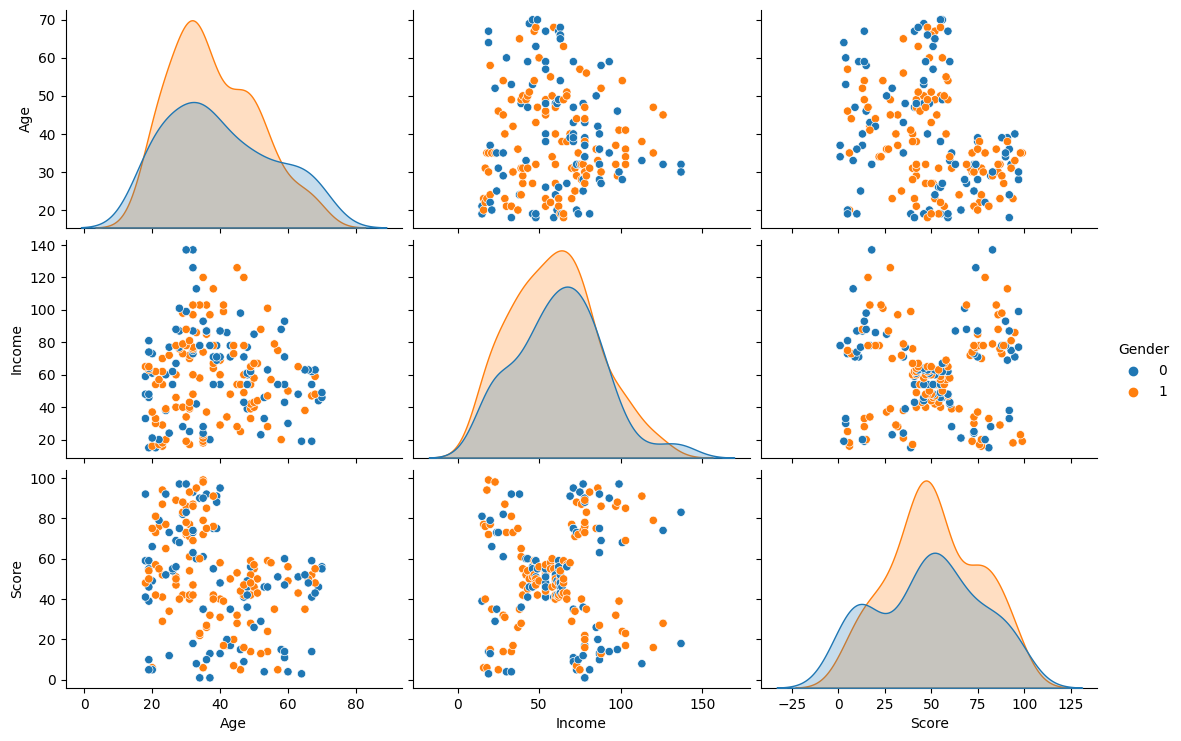

In [8]:
sns.pairplot(df.drop('CustomerID', axis=1), hue='Gender', aspect=1.5)
plt.show()

In [29]:
X = df.drop(['CustomerID', 'Gender'], axis=1)
# X = (X - X.mean(axis=0))/ X.std()

## K-Means

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

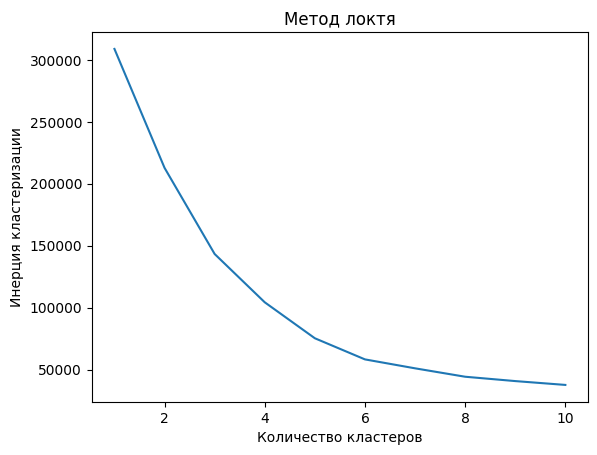

In [10]:
n_inertia = []

for i in range(1, 11):
    km = KMeans(n_clusters=i).fit(X)
    n_inertia.append(km.inertia_)

fig, ax = plt.subplots()
sns.lineplot(x=np.arange(1, 11), y=n_inertia, ax=ax)
ax.set_title('Метод локтя')
ax.set_xlabel('Количество кластеров')
ax.set_ylabel('Инерция кластеризации')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


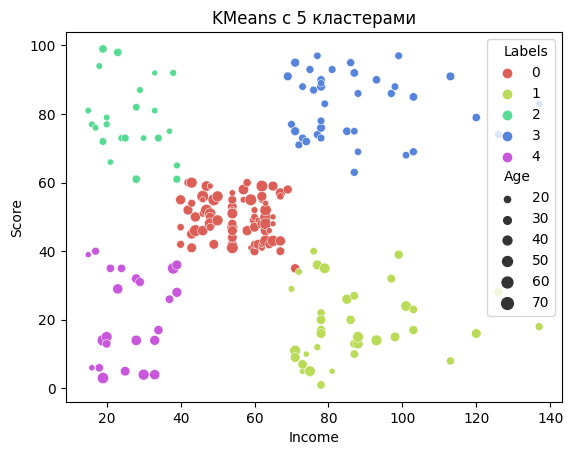

In [30]:
km3 = KMeans(n_clusters=5).fit(X)#.drop(['Labels'], axis=1))
X['Labels'] = km3.labels_

sns.scatterplot(x=X['Income'], y=X['Score'], hue=X['Labels'], size=X['Age'], palette=sns.color_palette('hls', 5))

plt.title('KMeans c 5 кластерами')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


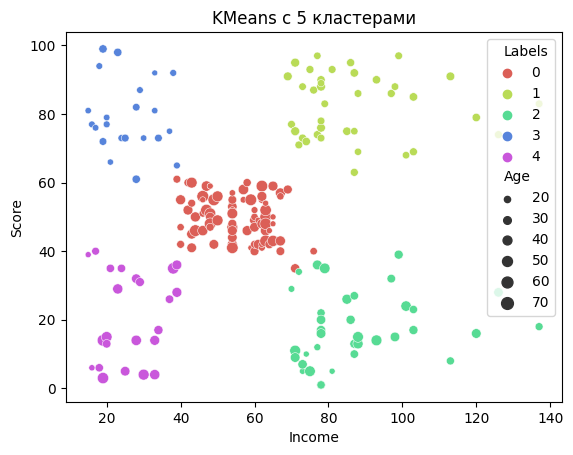

In [12]:
km5 = KMeans(n_clusters=5).fit(X.drop(['Labels'], axis=1))
X['Labels'] = km5.labels_

sns.scatterplot(x=X['Income'], y=X['Score'], hue=X['Labels'], size=X['Age'], palette=sns.color_palette('hls', 5))

plt.title('KMeans c 5 кластерами')
plt.show()

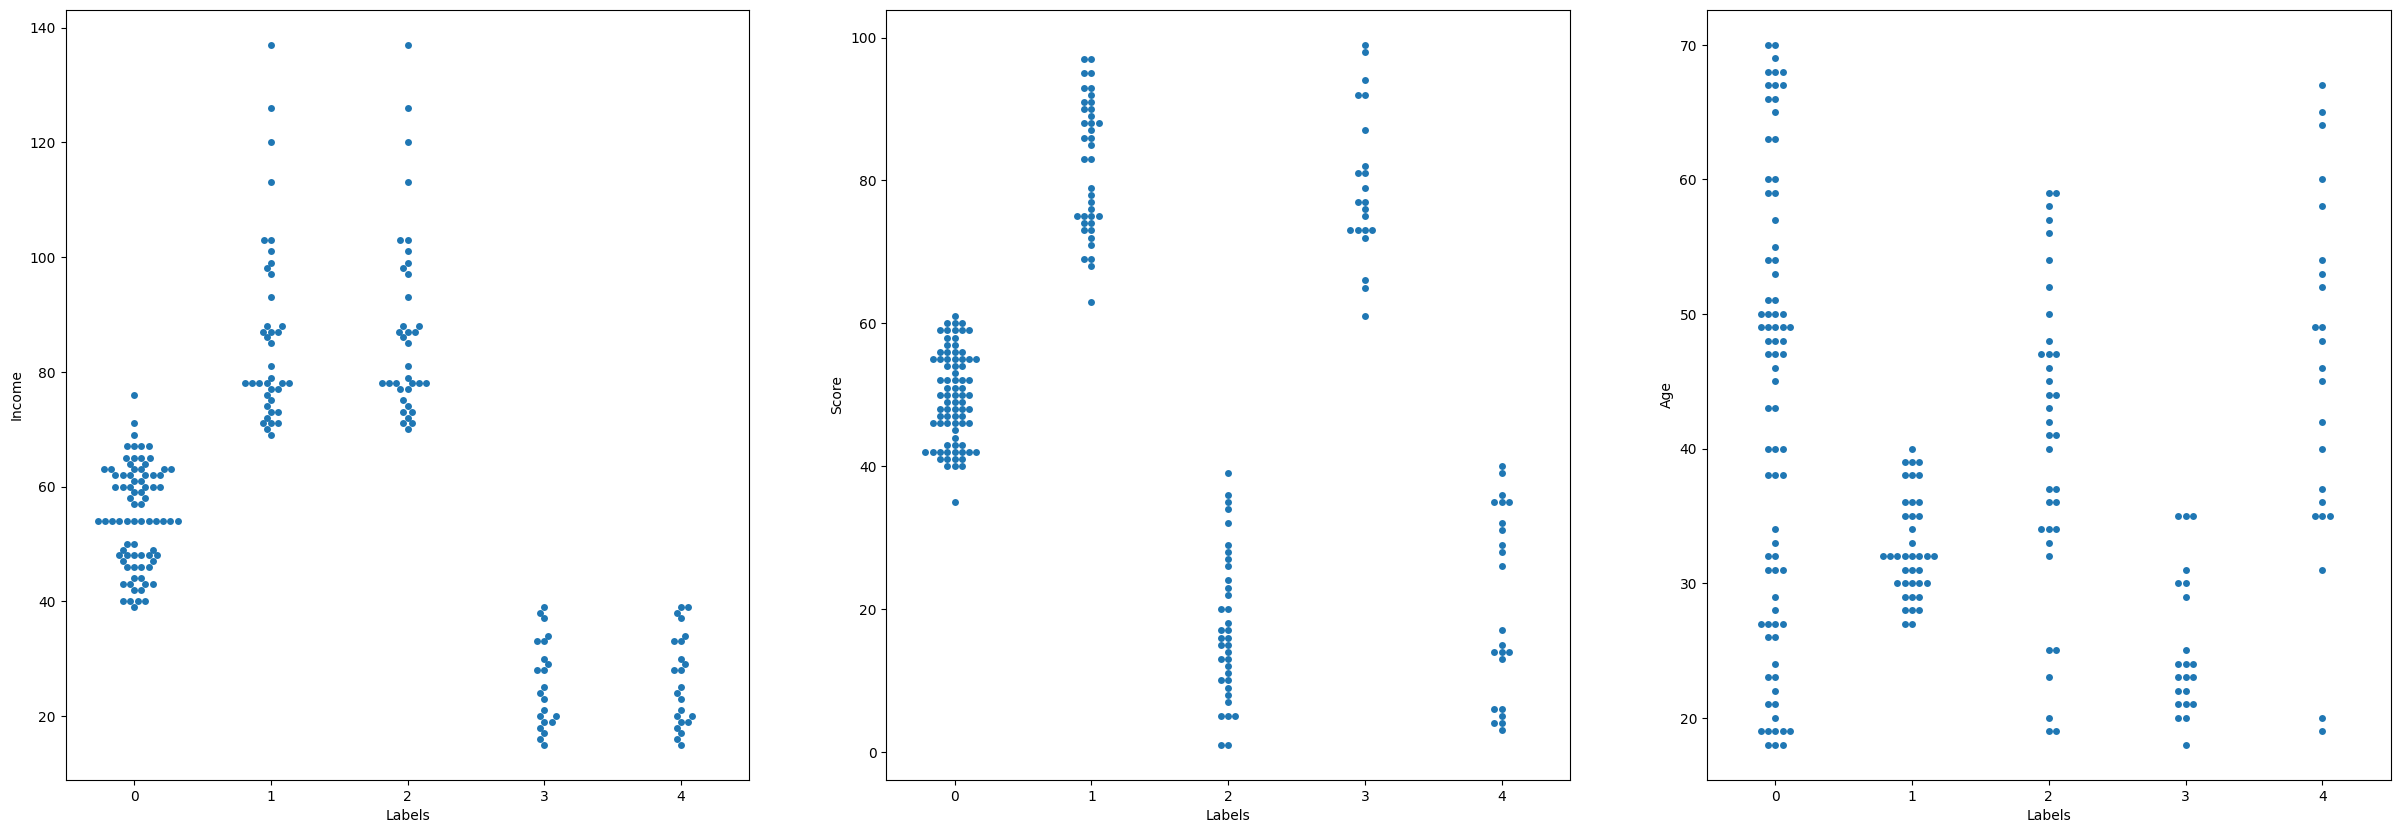

In [13]:
#для категориальных данных

fig = plt.figure(figsize=(30,10))
ax = fig.add_subplot(131)
sns.swarmplot(x='Labels', y='Income', data=X, ax=ax)

ax = fig.add_subplot(132)
sns.swarmplot(x='Labels', y='Score', data=X, ax=ax)

ax = fig.add_subplot(133)
sns.swarmplot(x='Labels', y='Age', data=X, ax=ax)

plt.show()

In [14]:
print("Silhouette score: {}".format(silhouette_score(X.drop(['Labels'], axis=1), X.Labels)))

Silhouette score: 0.44504314844253573


## Иерархическая кластеризация (аггломеративная)

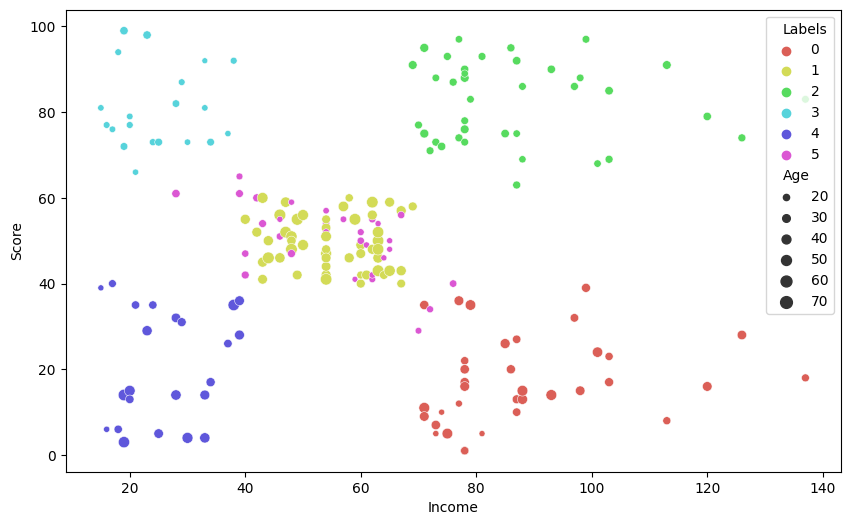

In [32]:
agglom = AgglomerativeClustering(n_clusters=6, linkage='ward').fit(X.drop(['Labels'], axis=1)) # ward, complete...

X['Labels'] = agglom.labels_
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X['Income'], y=X['Score'], hue=X['Labels'], size=X['Age'],
                palette=sns.color_palette('hls', 6))
plt.show()

In [16]:
print("Silhouette score: {}".format(silhouette_score(X.drop(['Labels'], axis=1), X.Labels)))

Silhouette score: 0.44308912983504156


In [17]:
dist = distance_matrix(X.drop(['Labels'], axis=1), X.drop(['Labels'], axis=1))
print(dist)

[[  0.          42.04759208  33.03028913 ... 117.1110584  124.47489707
  130.15759678]
 [ 42.04759208   0.          75.01333215 ... 111.7631424  137.74614332
  122.34786471]
 [ 33.03028913  75.01333215   0.         ... 129.87686476 122.18428704
  143.77065069]
 ...
 [117.1110584  111.7631424  129.87686476 ...   0.          57.07013229
   14.35270009]
 [124.47489707 137.74614332 122.18428704 ...  57.07013229   0.
   65.03076195]
 [130.15759678 122.34786471 143.77065069 ...  14.35270009  65.03076195
    0.        ]]


In [18]:
hierarchy_clustering = hierarchy.linkage(dist, 'average')

<ipython-input-18-0fc946dad999>:1: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  hierarchy_clustering = hierarchy.linkage(dist, 'average')


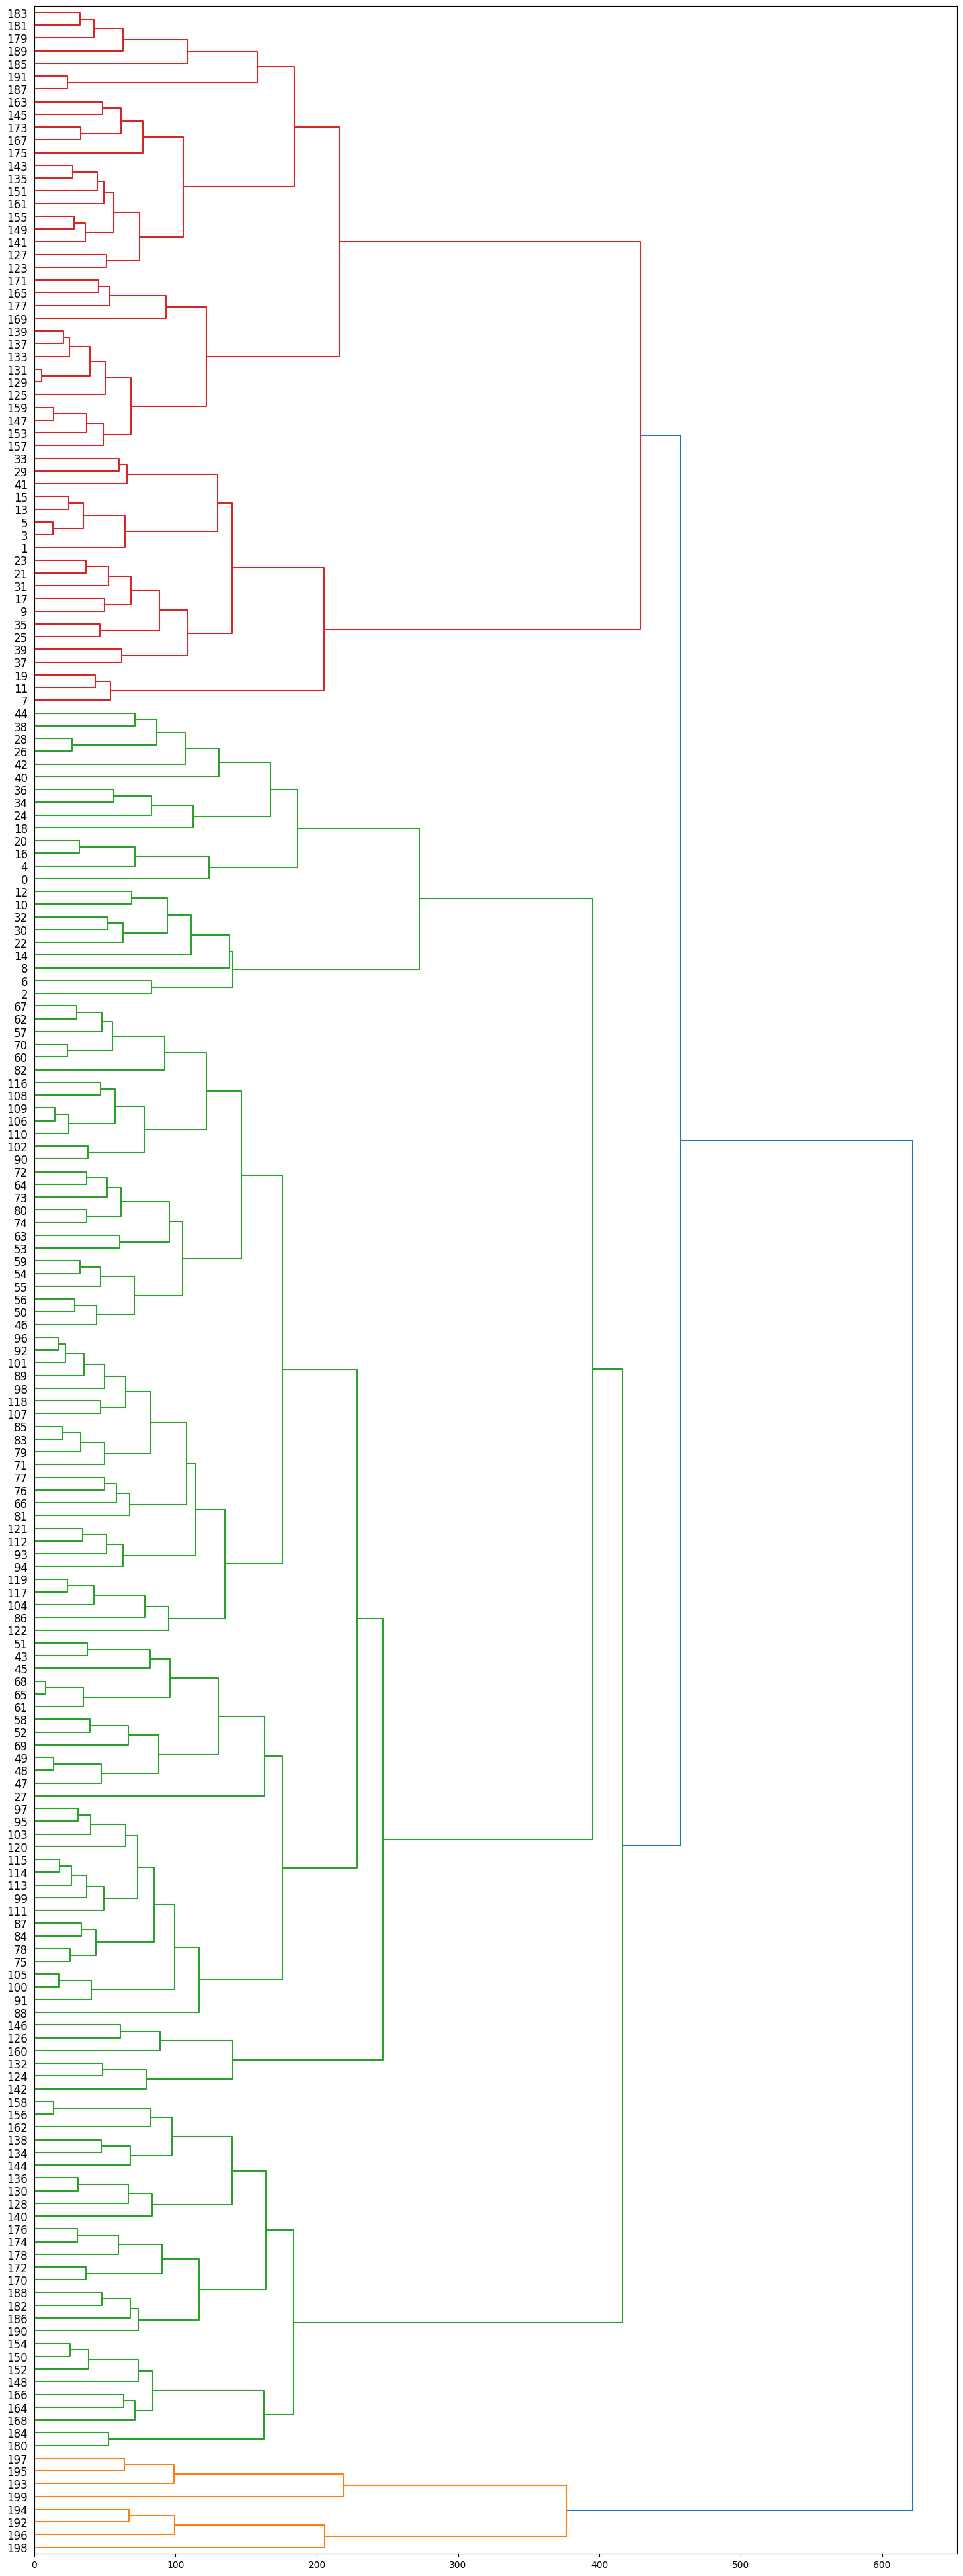

In [19]:
plt.figure(figsize=(18, 50))
dendro = hierarchy.dendrogram(hierarchy_clustering, leaf_font_size=12, orientation='right')

In [20]:
X.iloc[154]

Age       47
Income    78
Score     16
Labels     0
Name: 154, dtype: int64

In [21]:
X.iloc[150]

Age       43
Income    78
Score     17
Labels     0
Name: 150, dtype: int64

## DBSCAN

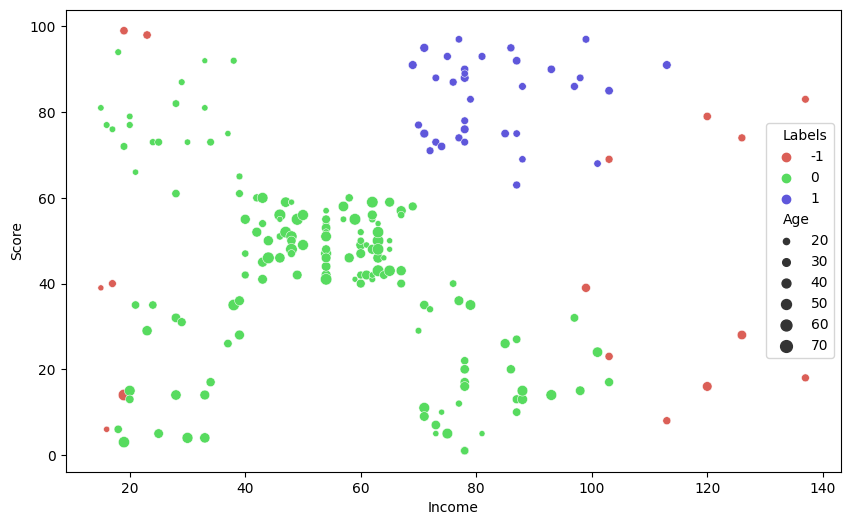

In [33]:
db = DBSCAN(eps=15, min_samples=6).fit(X.drop(['Labels'], axis=1))

X['Labels'] = db.labels_
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X['Income'], y=X['Score'], hue=X['Labels'], size=X['Age'],
                palette=sns.color_palette('hls', np.unique(db.labels_).shape[0]))
plt.show()


In [23]:
print("Silhouette score: {}".format(silhouette_score(X.drop(['Labels'], axis=1), X.Labels)))

Silhouette score: 0.27597205595332247


## C-means

In [24]:
# X.drop(['Labels'], axis=1, inplace=True)
fcm = FCM(n_clusters=6)
fcm.fit(X.values)

# fcm_centers = fcm.centers
fcm_labels_soft = fcm.soft_predict(X.values)
fcm_labels = fcm.predict(X.values)

NameError: ignored

In [25]:
# fcm_labels[fcm_labels_soft.max(axis=1) < 0.3] = -1 # помогает найти выбросы

In [26]:
X['Labels'] = fcm_labels

NameError: ignored

<ipython-input-27-b3922e977a27>:1: UserWarning: The palette list has more values (7) than needed (3), which may not be intended.
  sns.relplot(x='Income', y='Score', hue='Labels',


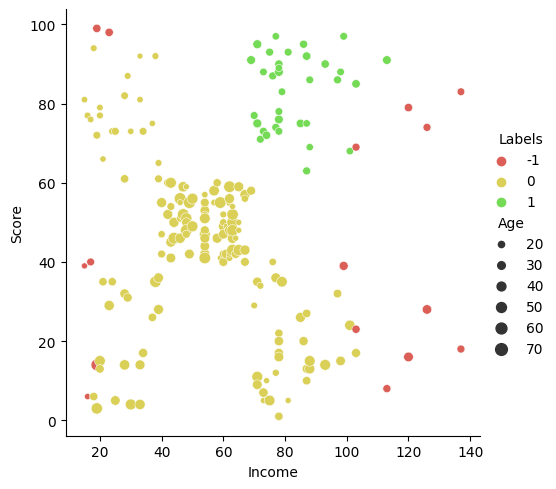

In [27]:
sns.relplot(x='Income', y='Score', hue='Labels',
            size='Age', data=X, palette = sns.color_palette('hls', 7))

In [28]:
print("Silhouette score: {}".format(silhouette_score(X.drop(['Labels'], axis=1), X.Labels)))

Silhouette score: 0.27597205595332247
